<a href="https://colab.research.google.com/github/Joicylara/IA/blob/main/2_2_Classificar_a_qualidade_de_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagine que você é o proprietário de uma cafeteria e deseja criar um sistema fuzzy para classificar a qualidade do café que seus baristas preparam. Você decidiu usar a temperatura e a quantidade de açúcar como entradas para o sistema e as classes de qualidade de café: "Ruim", "Regular" e "Bom".


Obs.: Para o problema de classificar a qualidade de um café com base na temperatura e na quantidade de açúcar

Primeiro, instale a biblioteca skfuzzy:



In [3]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=8904625bce27ca58ecd744507aa9ae317bfe70f09644cc2304459e0b8a91ecbb
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Em seguida, importe as bibliotecas necessárias:


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Crie as variáveis de entrada e saída fuzzy:

In [77]:
# Variáveis de entrada
temperatura = ctrl.Antecedent(np.arange(0, 101, 1), 'temperatura')
acucar = ctrl.Antecedent(np.arange(0, 11, 1), 'acucar')
aroma = ctrl.Antecedent(np.arange(0, 11, 1), 'aroma')
sabor = ctrl.Antecedent(np.arange(0, 101, 1), 'sabor')
tonalidade = ctrl.Antecedent(np.arange(0, 11, 1), 'tonalidade')

# Variável de saída
# qualidade = ctrl.Consequent(np.arange(0, 11, 1), 'qualidade', defuzzify_method='centroid')
qualidade = ctrl.Consequent(np.arange(0, 11, 1), 'qualidade', defuzzify_method='mom')


Em seguida, vamos definir as funções de pertinência para cada variável fuzzy. Para a temperatura, vamos definir três funções: "baixa", "média" e "alta". Para o açúcar, vamos definir quatro funções: "nenhum", "pouco", "médio" e "muito". Para a qualidade, vamos definir três funções: "ruim", "regular" e "bom".

In [73]:
# Funções de pertinência para temperatura
# mudança das variáveis fuzzy de trimf(triangular) p/ trapmf (trapezoidal)
# alteração dos valores das variável linguística
# acréscimo de mais uma função de pertinência para temperatura
temperatura['muito_baixa'] = fuzz.trapmf(temperatura.universe, [0, 0, 2, 6])
temperatura['baixa'] = fuzz.trapmf(temperatura.universe, [0, 10, 15, 20])
temperatura['média'] = fuzz.trapmf(temperatura.universe, [20, 30, 40, 55])
temperatura['alta'] = fuzz.trapmf(temperatura.universe, [50, 70, 80, 85])
temperatura['muito_alta'] = fuzz.trapmf(temperatura.universe, [85, 90, 100, 100])

# Funções de pertinência para açúcar
# acréscimo de mais uma função de pertinência
# mudança nos valores da variável linguística
acucar['nenhum'] = fuzz.trimf(acucar.universe, [0, 0, 2])
acucar['pouco'] = fuzz.trimf(acucar.universe, [0, 2, 6])
acucar['médio'] = fuzz.trimf(acucar.universe, [2, 6, 8])
acucar['Considerável'] = fuzz.trimf(acucar.universe, [4, 8, 10])
acucar['muito'] = fuzz.trimf(acucar.universe, [8, 10, 10])

aroma['nenhum'] = fuzz.trapmf(aroma.universe, [0, 0, 1, 2])
aroma['pouco'] = fuzz.trapmf(aroma.universe, [2, 3, 4, 5])
aroma['considerável'] = fuzz.trapmf(aroma.universe, [5, 6, 8, 10])
aroma['muito'] = fuzz.trapmf(aroma.universe, [7, 8, 10, 10])


sabor['nenhum'] = fuzz.trapmf(sabor.universe, [0, 0, 10, 20])
sabor['pouco'] = fuzz.trapmf(sabor.universe, [20, 30, 40, 55])
sabor['considerável'] = fuzz.trapmf(sabor.universe, [50, 60, 80, 100])
sabor['muito_bom'] = fuzz.trapmf(sabor.universe, [85, 90, 100, 100])

tonalidade['nenhum'] = fuzz.trapmf(tonalidade.universe, [0, 0, 1, 2])
tonalidade['pouco'] = fuzz.trapmf(tonalidade.universe, [2, 2, 3, 4])
tonalidade['considerável'] = fuzz.trapmf(tonalidade.universe, [4, 6, 8, 10])
tonalidade['muito'] = fuzz.trapmf(tonalidade.universe, [8, 9, 10, 10])

# Funções de pertinência para qualidade
# mudança da variáveil fuzzy de trimf(triangular) p/ trapmf (trapezoidal) e vice versa
# alteração no valor da variável linguística
qualidade['ruim'] = fuzz.trapmf(qualidade.universe, [0, 0, 2, 4])
qualidade['regular'] = fuzz.trimf(qualidade.universe, [2, 4, 6])
qualidade['bom'] = fuzz.trapmf(qualidade.universe, [4, 6, 8, 10])
qualidade['excelente'] = fuzz.trimf(qualidade.universe, [8, 10, 10])


Em seguida, vamos definir as regras fuzzy que governam o comportamento do sistema. Aqui, vamos usar algumas regras simples que representam a intuição humana para classificar a qualidade do café:




In [74]:
# Bastantes regras
# acréscimo de mais 9 regras, que são as relações das novas funções de pertinência
#'''
regra1 = ctrl.Rule(temperatura['baixa'] & acucar['nenhum'], qualidade['ruim'])
regra2 = ctrl.Rule(temperatura['média'] & acucar['nenhum'], qualidade['regular'])
regra3 = ctrl.Rule(temperatura['alta'] & acucar['nenhum'], qualidade['ruim'])
regra4 = ctrl.Rule(temperatura['muito_alta'] & acucar['nenhum'], qualidade['excelente'])
regra5 = ctrl.Rule(temperatura['baixa'] & acucar['pouco'], qualidade['regular'])
regra6 = ctrl.Rule(temperatura['média'] & acucar['pouco'], qualidade['bom'])
regra7 = ctrl.Rule(temperatura['alta'] & acucar['pouco'], qualidade['bom'])
regra8 = ctrl.Rule(temperatura['muito_alta'] & acucar['pouco'], qualidade['excelente'])
regra9 = ctrl.Rule(temperatura['baixa'] & acucar['médio'], qualidade['bom'])
regra10 = ctrl.Rule(temperatura['média'] & acucar['médio'], qualidade['bom'])
regra11 = ctrl.Rule(temperatura['alta'] & acucar['médio'], qualidade['regular'])
regra12 = ctrl.Rule(temperatura['muito_alta'] & acucar['médio'], qualidade['regular'])
regra13 = ctrl.Rule(temperatura['baixa'] & acucar['muito'], qualidade['bom'])
regra14 = ctrl.Rule(temperatura['média'] & acucar['muito'], qualidade['bom'])
regra15 = ctrl.Rule(temperatura['alta'] & acucar['muito'], qualidade['regular'])
regra16 = ctrl.Rule(temperatura['muito_alta'] & acucar['muito'], qualidade['regular'])

regra17 = ctrl.Rule(temperatura['muito_baixa'] & acucar['nenhum'], qualidade['ruim'])
regra18 = ctrl.Rule(temperatura['muito_baixa'] & acucar['pouco'], qualidade['ruim'])
regra19 = ctrl.Rule(temperatura['muito_baixa'] & acucar['médio'], qualidade['ruim'])
regra20 = ctrl.Rule(temperatura['muito_baixa'] & acucar['Considerável'], qualidade['regular'])
regra21 = ctrl.Rule(temperatura['muito_baixa'] & acucar['muito'], qualidade['ruim'])
regra22 = ctrl.Rule(temperatura['baixa'] & acucar['Considerável'], qualidade['ruim'])
regra23 = ctrl.Rule(temperatura['média'] & acucar['Considerável'], qualidade['regular'])
regra24 = ctrl.Rule(temperatura['alta'] & acucar['Considerável'], qualidade['excelente'])
regra25 = ctrl.Rule(temperatura['muito_alta'] & acucar['Considerável'], qualidade['excelente'])

regra26 = ctrl.Rule(aroma['nenhum'] & sabor['nenhum'] & tonalidade['nenhum'], qualidade['ruim'])
regra27 = ctrl.Rule(aroma['nenhum'] & sabor['nenhum'] & tonalidade['pouco'], qualidade['ruim'])
regra28 = ctrl.Rule(aroma['nenhum'] & sabor['nenhum'] & tonalidade['considerável'], qualidade['ruim'])
regra29 = ctrl.Rule(aroma['nenhum'] & sabor['nenhum'] & tonalidade['muito'], qualidade['ruim'])
regra30 = ctrl.Rule(aroma['nenhum'] & sabor['considerável'] & tonalidade['muito'], qualidade['regular'])
regra31 = ctrl.Rule(aroma['nenhum'] & sabor['muito_bom'] & tonalidade['considerável'], qualidade['bom'])
regra32 = ctrl.Rule(aroma['considerável'] & sabor['muito_bom'] & tonalidade['muito'], qualidade['excelente'])
regra33 = ctrl.Rule(aroma['muito'] & sabor['muito_bom'] & tonalidade['nenhum'], qualidade['ruim'])
regra34 = ctrl.Rule(aroma['considerável'] & sabor['considerável'] & tonalidade['considerável'], qualidade['excelente'])

#'''


In [ ]:
#poucas regras
'''
regra1 = ctrl.Rule(temperatura['baixa'] | acucar['pouco'], qualidade['ruim'])
regra2 = ctrl.Rule(temperatura['baixa'] | acucar['médio'], qualidade['regular'])
regra3 = ctrl.Rule(temperatura['baixa'] | acucar['muito'], qualidade['bom'])
regra4 = ctrl.Rule(temperatura['média'] | acucar['pouco'], qualidade['regular'])
regra5 = ctrl.Rule(temperatura['média'] | acucar['médio'], qualidade['bom'])
regra6 = ctrl.Rule(temperatura['média'] | acucar['muito'], qualidade['excelente'])
regra7 = ctrl.Rule(temperatura['alta'] | acucar['pouco'], qualidade['bom'])
regra8 = ctrl.Rule(temperatura['alta'] | acucar['médio'], qualidade['excelente'])
regra9 = ctrl.Rule(temperatura['alta'] | acucar['muito'], qualidade['excelente'])

In [75]:
#poucas regras
#sistema=ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
#muitas regras
sistema=ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20, regra21, regra22, regra23, regra24, regra25, regra26, regra27, regra28, regra29, regra30, regra31, regra32, regra33, regra34])
simulador = ctrl.ControlSystemSimulation(sistema)

# primeiro teste: temperatura = 80, açucar = 8, resultado é a temperatura sendo verdade absoluta para 'alta' e açucar 'considerável', portanto, qualidade sendo verdade como 'excelente'
# segundo teste: temperatura = 25, açucar = 5, temperatura sendo parcionalmente verdade com média, açucar com 0.7 de pertinência para médio e qualidade parcionalmente bom também
# terceiro teste: temperatura = 45, açucar = 6, temperatura 0.7 de pertinência para média, açucar verdade absoluta para médio e meio para considerável, e qualidade meio para regular e 0.7 para bom
simulador.input['temperatura']=0
simulador.input['acucar']=0
simulador.input['aroma']=0
simulador.input['sabor']=0
simulador.input['tonalidade']=0

simulador.compute()
print(simulador.output['qualidade'])


1.5555555555555556


In [ ]:
# Computar a saída fuzzy
simulador.compute()

# Obter o valor da qualidade do café
qualidade_cafe = simulador.output['qualidade']

print("Qualidade do café: ", qualidade_cafe)


Qualidade do café:  5.397435897435898


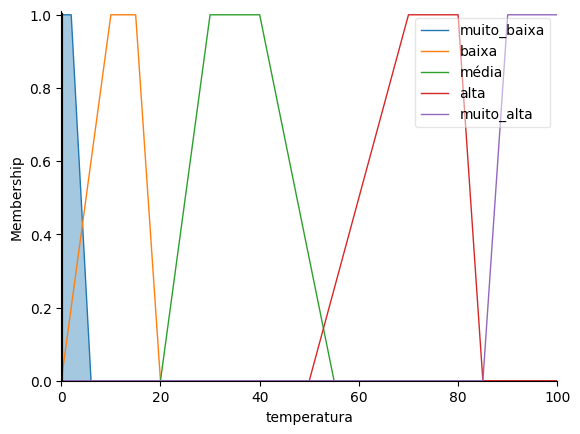

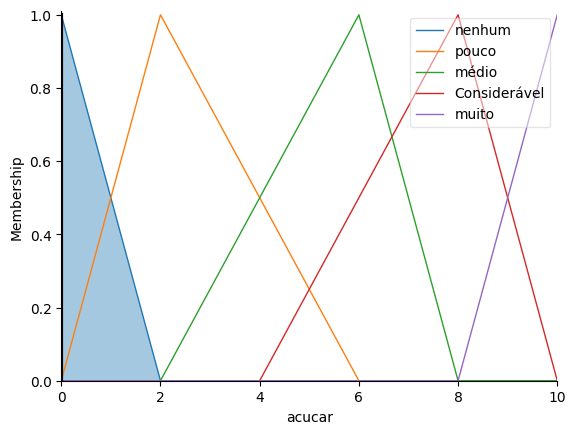

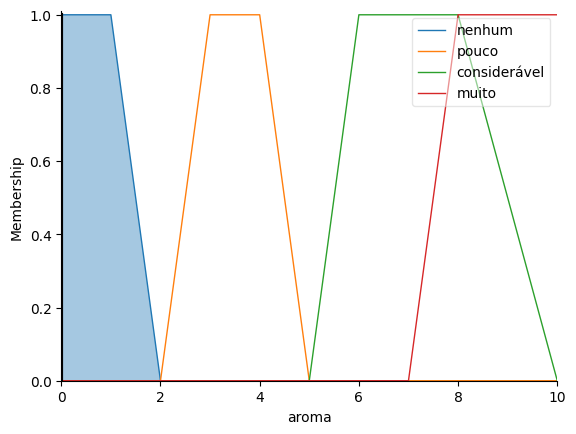

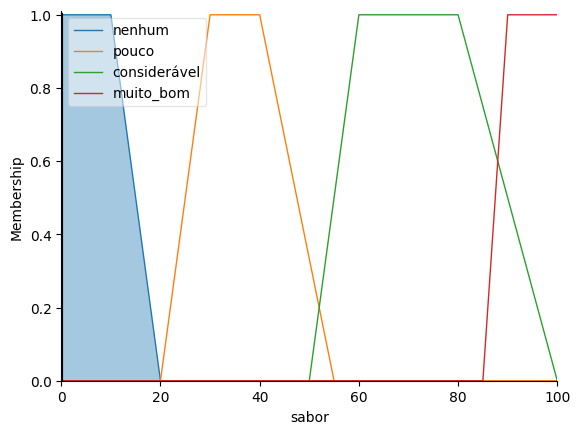

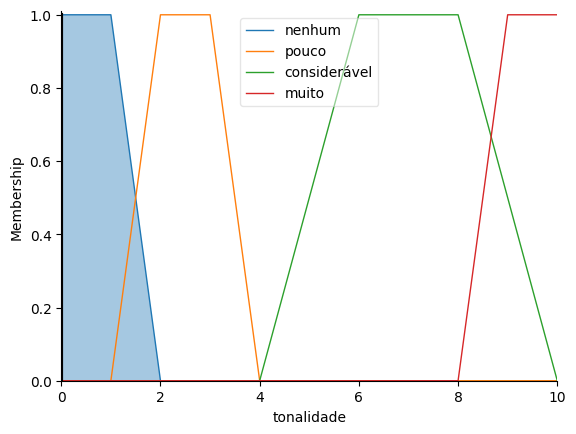

In [76]:
 # Plotando os gráficos das funções de pertinência e do resultado
temperatura.view(simulador)
acucar.view(simulador)
aroma.view(simulador)
sabor.view(simulador)
tonalidade.view(simulador)

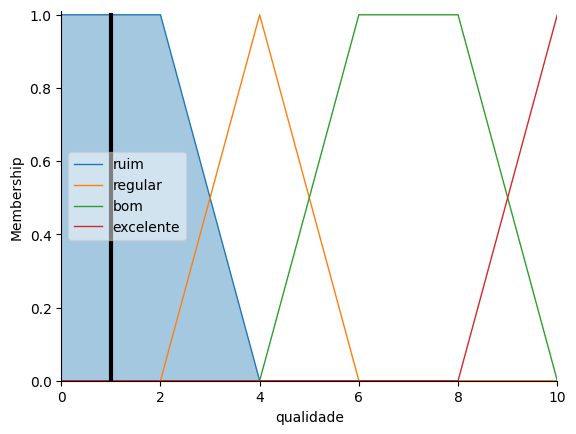

In [67]:
qualidade.view(simulador)